### Import Libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [64]:
df = pd.read_csv('./aug_train.csv')
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


## Explore dataset

In [65]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

There are 10 categorical columns and 3 nominal columns(except the target). 

* Categorical Columns: city, gender, relevent_experience, enrolled_university, education_level, major_discipline, experience, company_size, company_type, last_new_job
* Nominal Columns: enrollee_id, city_development_index, training_hours


In [67]:
df.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                     True
relevent_experience       False
enrolled_university        True
education_level            True
major_discipline           True
experience                 True
company_size               True
company_type               True
last_new_job               True
training_hours            False
target                    False
dtype: bool

Based on above resutls, **eight columns** have null values which should be handled.

In [68]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## Pre-processing Dataset

In [69]:
df_copy = df.copy()
print('Shape of dataframe before removing: ', df_copy.shape)

Shape of dataframe before removing:  (19158, 14)


In [70]:
# Remove rows with more than 5 null values
many_null_condition = df_copy.isnull().sum(axis=1)>5
df_copy = df_copy[~many_null_condition]

In [71]:
df_copy.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4438
relevent_experience          0
enrolled_university        332
education_level            392
major_discipline          2739
experience                  56
company_size              5864
company_type              6066
last_new_job               390
training_hours               0
target                       0
dtype: int64

In [72]:
print('Shape of dataframe after removing: ', df_copy.shape)

Shape of dataframe after removing:  (19084, 14)


### Explore Columns and Clean dataset

In [73]:
def visualize_pie(size,column,pie_colors):
    print('\033[1m' +"Before Filling Null Values:"+ '\033[0m')

    labels = df_copy[column].value_counts().index
    values = df_copy[column].value_counts()
    plt.figure(figsize=size)
    plt.pie(values,labels=labels, colors = pie_colors,autopct="%1.1f%%"
        ,textprops={'fontsize': 9})
    plt.show()
    
    
def visualize_bar(size, column, y_label=None, title=None):
    print('\033[1m' +"Mean of Target for all Categories (with Null Values if existing)"+ '\033[0m')
    plt.figure(figsize=size)
    df_copy_1 = df_copy.copy()
    df_copy_1[column] = df_copy_1[column].fillna('Nan')
    enr = df_copy_1.groupby(column,dropna=False)['target'].mean()
    labels = enr.index
    values = enr.values
    plt.barh(labels,values, color='mediumblue')
    plt.yticks(fontsize=9)
    plt.xlabel('mean_target', fontsize=9)
    plt.ylabel(y_label, fontsize = 9)
    plt.title(title, fontsize = 11)

    plt.show()
    

#### **Enrollee Id**: There is no null values in this column

In [74]:
df_copy['enrollee_id'].value_counts()

enrollee_id
8949     1
30726    1
31273    1
16098    1
27022    1
        ..
4341     1
19633    1
11960    1
10043    1
23834    1
Name: count, Length: 19084, dtype: int64

There is no duplicated record in the dataset

#### **City**: There is no null values in this column

In [75]:
df_copy['city'].value_counts()

city
city_103    4338
city_21     2687
city_16     1529
city_114    1332
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

#### **City Development Index**: There is no null values in this column

In [76]:
df_copy['city_development_index'].describe()

count    19084.000000
mean         0.829014
std          0.123292
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

#### **Gender** : This column contains null values
    

In [77]:
df_copy['gender'].value_counts()

gender
Male      13218
Female     1238
Other       190
Name: count, dtype: int64

Before Filling Null Values:


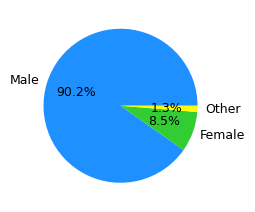

Mean of Target for all Categories (with Null Values if existing)


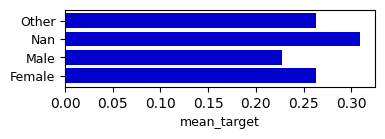

In [78]:
# Pie Chart
colors = ['dodgerblue','limegreen','yellow']
visualize_pie((2.5,2.5),'gender',colors)

# Bar Plot
visualize_bar((4,1), 'gender')


In [79]:
# Fill null values with the most frequent category
df_copy['gender'] = df_copy['gender'].fillna(df_copy['gender'].value_counts().index[0])

#### **Revelent Experience**: There is no null values in this column

In [80]:
df_copy['relevent_experience'].value_counts()

relevent_experience
Has relevent experience    13774
No relevent experience      5310
Name: count, dtype: int64

Before Filling Null Values:


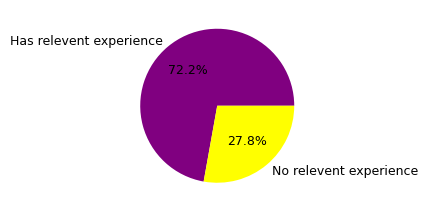

Mean of Target for all Categories (with Null Values if existing)


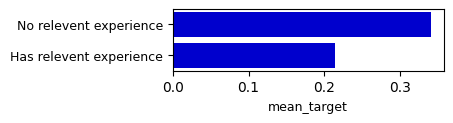

In [81]:
# Pie Chart
colors = ['purple','yellow']       
visualize_pie((2.5,2.5),'relevent_experience',colors)

# Bar Plot
visualize_bar((3.5,0.8), 'relevent_experience')

In [82]:
# Convert categorical values to numbers
df_copy['relevent_experience'].replace(['No relevent experience','Has relevent experience'],
                             [0,1],inplace=True)

#### **Enrolled University**:  This column contains null values

In [83]:
df_copy['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13804
Full time course     3751
Part time course     1197
Name: count, dtype: int64

Before Filling Null Values:


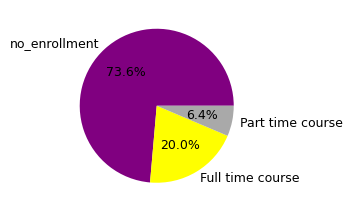

Mean of Target for all Categories (with Null Values if existing)


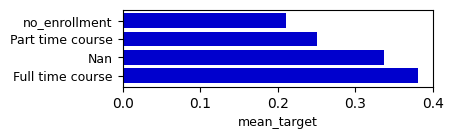

In [84]:
# Pie Chart
colors = ['purple','yellow','darkgray']
visualize_pie((2.5,2.5),'enrolled_university',colors)

# Bar Plot
visualize_bar((4,1), 'enrolled_university')

In [85]:
# Fill null values with the most frequent category
df_copy['enrolled_university'] = df_copy['enrolled_university'].fillna(df_copy['enrolled_university'].value_counts().index[0])

#### **Education Level** :  This column contains null values

In [86]:
df_copy['education_level'].value_counts()

education_level
Graduate          11597
Masters            4361
High School        2013
Phd                 414
Primary School      307
Name: count, dtype: int64

Before Filling Null Values:


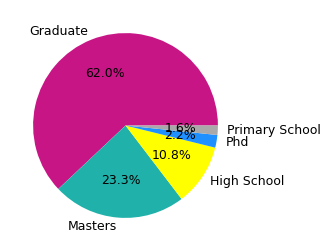

Mean of Target for all Categories (with Null Values if existing)


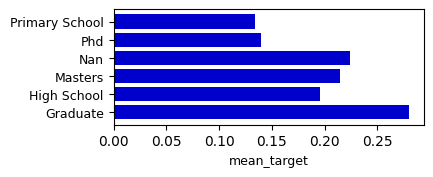

In [87]:
# Pie Chart
colors = ['mediumvioletred','lightseagreen','yellow','dodgerblue','darkgray','c']
visualize_pie((3,3),'education_level',colors)

# Bar Plot
visualize_bar((4,1.5), 'education_level')

In [88]:
# Fill null values with the most frequent category
df_copy['education_level'] = df_copy['education_level'].fillna(df_copy['education_level'].value_counts().index[0])

#### **Major Discipline**:  This column contains null values

In [89]:
df_copy['major_discipline'].value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

Before Filling Null Values:


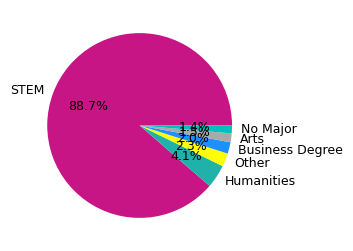

Mean of Target for all Categories (with Null Values if existing)


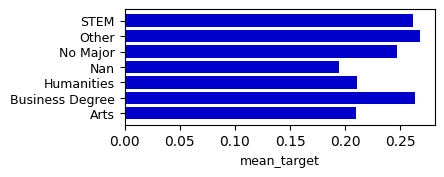

In [90]:
# Pie Chart
colors = ['mediumvioletred','lightseagreen','yellow','dodgerblue','darkgray','c','red']
visualize_pie((3,3),'major_discipline',colors)

# Bar Plot
visualize_bar((4,1.5), 'major_discipline')

In [91]:
# Fill null values with a new category: NM = Not Mentioned
df_copy['major_discipline'] = df_copy['major_discipline'].fillna('NM')

#### **Experience**: This column contains null values

In [92]:
df_copy['experience'].value_counts()

experience
>20    3280
5      1424
4      1395
3      1343
6      1213
2      1119
7      1027
10      985
9       979
8       800
15      683
11      664
14      586
1       543
<1      514
16      507
12      493
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

Mean of Target for all Categories (with Null Values if existing)


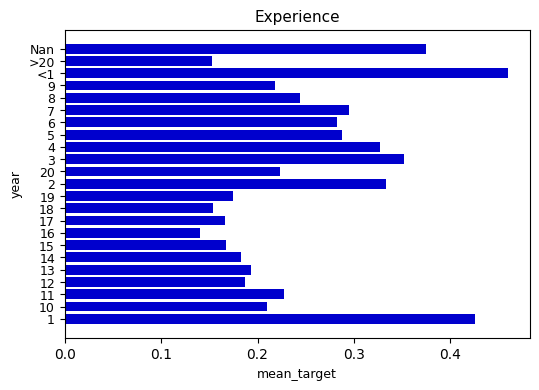

In [93]:
# Bar Plot
visualize_bar((6,4), 'experience', y_label='year', title='Experience')

In [94]:
# Replace >20 and <1 with 21 and 1
df_copy['experience'].replace(['>20','<1'],['21','1'],inplace=True)

# Fill null values with the most frequent category
df_copy['experience'].fillna(df_copy['experience'].value_counts().index[0],inplace=True)
df_copy['experience'] =df_copy['experience'].astype('float')

#### **Company Size**:  This column contains null values

In [95]:
df_copy['company_size'].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

Before Filling Null Values:


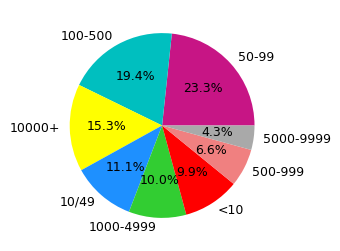

Mean of Target for all Categories (with Null Values if existing)


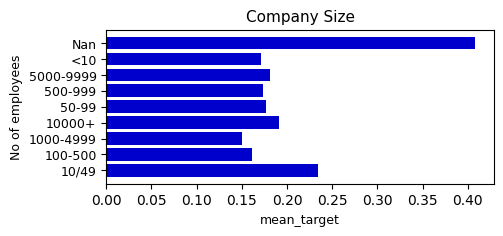

In [96]:
# Pie Chart
colors = ['mediumvioletred','c','yellow','dodgerblue','limegreen','red','lightcoral','darkgray']
visualize_pie((3,3),'company_size',colors)

# Bar Plot
visualize_bar((5,2), 'company_size', y_label='No of employees', title='Company Size')

In [97]:
# Combine some categories
df_copy['company_size'].replace(['<10','10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+',],
                             ['Startup','Small','Small','Medium','Medium','Large','Large','Very_Large'],inplace=True)

In [98]:
df_copy['company_size'].value_counts()

company_size
Small         4554
Medium        3448
Very_Large    2019
Large         1891
Startup       1308
Name: count, dtype: int64

Mean of Target for all Categories (with Null Values if existing)


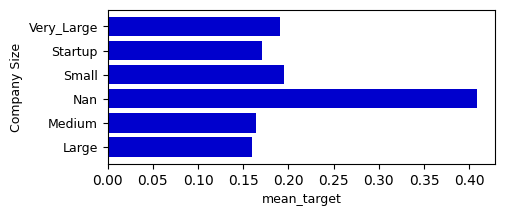

In [99]:
# Bar Plot
visualize_bar((5,2),'company_size', y_label='Company Size')

In [100]:
# Fill null values with the most frequent category
df_copy['company_size'] = df_copy['company_size'].fillna(df_copy['company_size'].value_counts().index[0])

#### **Company Type**: This column contains null values

In [101]:
df_copy['company_type'].value_counts()

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

Mean of Target for all Categories (with Null Values if existing)


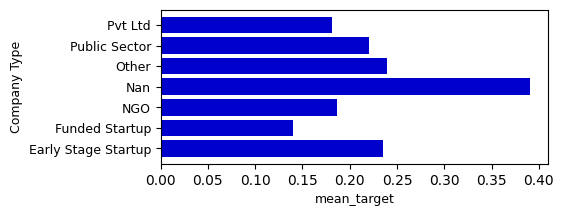

In [102]:
# Bar Plot
visualize_bar((5,2),'company_type', y_label='Company Type')

In [103]:
# Fill null values with a new category: NM = Not Mentioned
df_copy['company_type'] = df_copy['company_type'].fillna('NM')

#### **Last New Job**: This column contains null values

In [104]:
df_copy['last_new_job'].value_counts()

last_new_job
1        8032
>4       3285
2        2897
never    2428
4        1029
3        1023
Name: count, dtype: int64

Before Filling Null Values:


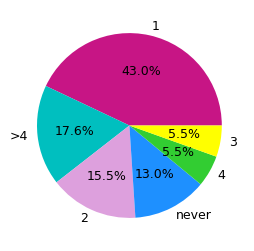

Mean of Target for all Categories (with Null Values if existing)


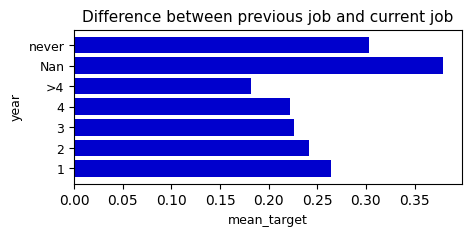

In [105]:
# Pie Chart
colors = ['mediumvioletred','c','plum','dodgerblue','limegreen','yellow','lightcoral','darkgray']
visualize_pie((3,3),'last_new_job',colors)

# Bar Plot
visualize_bar((5,2), 'last_new_job', y_label='year',
              title='Difference between previous job and current job')

In [106]:
df_copy['last_new_job'].replace(['>4','never'],['5','0'],inplace=True)
# Fill null values with the most frequent category
df_copy['last_new_job'].fillna(df_copy['last_new_job'].value_counts().index[0],inplace=True)
df_copy['last_new_job'] = df_copy['last_new_job'].astype('float')

#### **Training Hours**: There is no null values in this column

In [107]:
df_copy['training_hours'].value_counts()

training_hours
28     327
12     291
18     288
22     281
50     278
      ... 
266      6
234      5
272      5
286      5
238      4
Name: count, Length: 241, dtype: int64

In [108]:
df_copy.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

All the Null values are replaced 

In [109]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19084 non-null  int64  
 1   city                    19084 non-null  object 
 2   city_development_index  19084 non-null  float64
 3   gender                  19084 non-null  object 
 4   relevent_experience     19084 non-null  int64  
 5   enrolled_university     19084 non-null  object 
 6   education_level         19084 non-null  object 
 7   major_discipline        19084 non-null  object 
 8   experience              19084 non-null  float64
 9   company_size            19084 non-null  object 
 10  company_type            19084 non-null  object 
 11  last_new_job            19084 non-null  float64
 12  training_hours          19084 non-null  int64  
 13  target                  19084 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory u

Now, we should convert categorical variables into numerical format

In [110]:
def encoder_column(dataset,column):
    ExpLabelEncoder = LabelEncoder().fit(dataset[column])
    ExpList = ExpLabelEncoder.classes_
    dataset[column] = ExpLabelEncoder.transform(dataset[column])
    

New_df = df_copy.copy()
categorical_features = ['education_level','city','gender','enrolled_university','major_discipline','company_size'
                       ,'company_type']


for column in categorical_features:
    encoder_column(New_df,column) 


In [111]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19084 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19084 non-null  int64  
 1   city                    19084 non-null  int64  
 2   city_development_index  19084 non-null  float64
 3   gender                  19084 non-null  int64  
 4   relevent_experience     19084 non-null  int64  
 5   enrolled_university     19084 non-null  int64  
 6   education_level         19084 non-null  int64  
 7   major_discipline        19084 non-null  int64  
 8   experience              19084 non-null  float64
 9   company_size            19084 non-null  int64  
 10  company_type            19084 non-null  int64  
 11  last_new_job            19084 non-null  float64
 12  training_hours          19084 non-null  int64  
 13  target                  19084 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 2.2 

<Axes: >

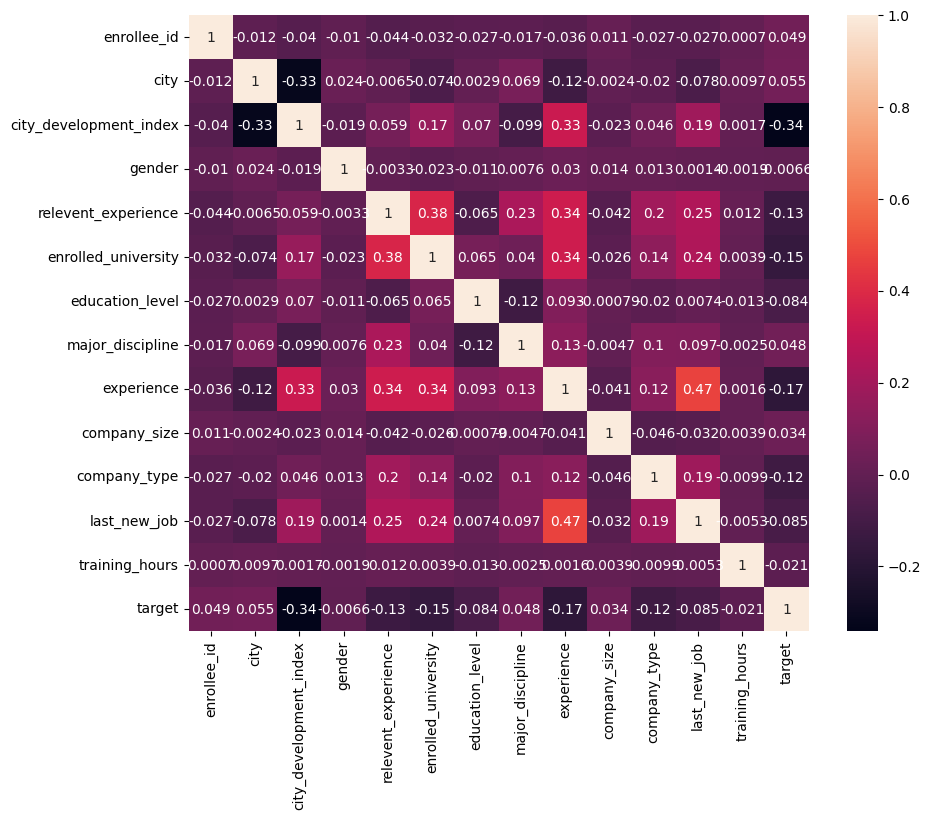

In [112]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(New_df.corr(),annot=True,color="b")

Text(0, 0.5, 'count')

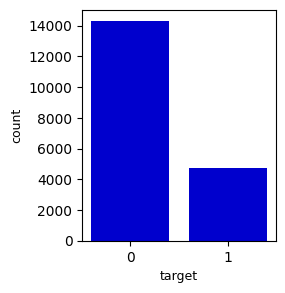

In [124]:
New_df['target']= New_df['target'].astype('int64')
target_count = New_df['target'].value_counts()
labels = target_count.index
values = target_count.values

plt.figure(figsize=(2.5,3))
plt.bar(labels,values, color='mediumblue')
plt.xticks(labels)
plt.xlabel('target', fontsize= 9)
plt.ylabel('count', fontsize= 9)

Based on above bar chart, the dataset is imbalanced.

In [114]:
"""
# Without oversampling
Y = New_df['target']
X = New_df.drop(columns=['target'])
X.columns = X.columns.astype(str)
"""

"\n# Without oversampling\nY = New_df['target']\nX = New_df.drop(columns=['target'])\nX.columns = X.columns.astype(str)\n"

In [115]:
from imblearn.over_sampling import SMOTE

X_org = New_df[New_df.columns[:len(New_df.columns)-1]].to_numpy()
Y_org = New_df[New_df.columns[len(New_df.columns)-1]].to_numpy()
print("Before oversampling: ",X_org.shape)
over = SMOTE(random_state=42)
X, Y = over.fit_resample(X_org,Y_org)
print("After oversampling: ",X.shape, Y.shape)

Before oversampling:  (19084, 13)
After oversampling:  (28646, 13) (28646,)


In [116]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

## Build Models

In [117]:
def prediction(model, X_train, Y_train, X_test, Y_test):

    model.fit(X_train, Y_train)
    model_prediction = model.predict(X_test)
    
    print(f'Accuracy score :{accuracy_score(model_prediction,Y_test):.2f}')
    avg = 'macro'
    print(f'Recall score :{recall_score(model_prediction,Y_test,average=avg,zero_division=True):.2f}')
    print(f'Precision score :{precision_score(model_prediction,Y_test,zero_division = True):.2f}')
    print(f'F1 score :{f1_score(model_prediction,Y_test,zero_division=True):.2f}')
    
    cm = confusion_matrix(Y_test,model_prediction)
    dis = ConfusionMatrixDisplay(cm,display_labels=["Not Leaving Job","Leaving Job"])
    fig, ax = plt.subplots(figsize=(4,4))
    dis.plot(ax=ax,cmap=plt.cm.Blues)


### Random Forest

Accuracy score :0.85
Recall score :0.85
Precision score :0.82
F1 score :0.84


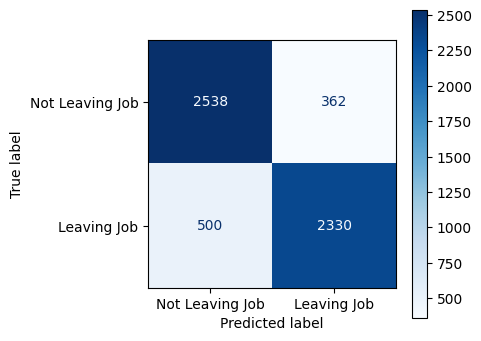

In [118]:
prediction(RandomForestClassifier(n_jobs=-1), X_train, Y_train, X_test, Y_test)

### Decision Tree

Accuracy score :0.80
Recall score :0.80
Precision score :0.81
F1 score :0.80


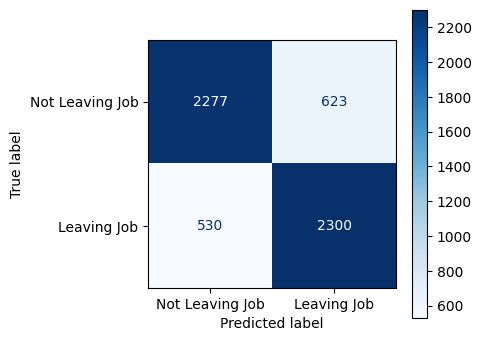

In [119]:
prediction(DecisionTreeClassifier(), X_train, Y_train, X_test, Y_test)

### KNN

Accuracy score :0.69
Recall score :0.70
Precision score :0.80
F1 score :0.72


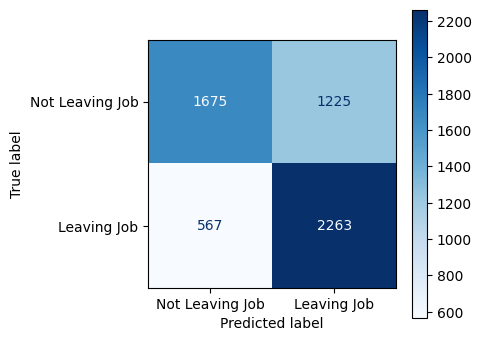

In [120]:
prediction(KNeighborsClassifier(), X_train, Y_train, X_test, Y_test)

### Logistic Regression

Accuracy score :0.59
Recall score :0.59
Precision score :0.59
F1 score :0.59


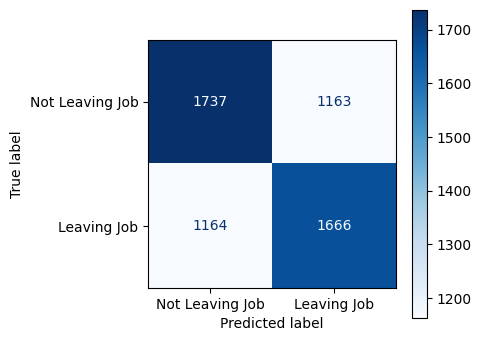

In [121]:
prediction(LogisticRegression(), X_train, Y_train, X_test, Y_test)